<a href="https://colab.research.google.com/github/ABRAHAMZI/pga31/blob/main/MSFT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installations
pip install git+https://github.com/pydata/pandas-datareader.git
!pip install pandas-datareader
!pip install --upgrade pandas-datareader


In [ ]:
#basic data importing with pand reader
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

#testing data extracting from yahoo finance using pandas_datareader
pdr.data.get_data_yahoo('MSFT')
import pandas_datareader as pdr
data = pdr.get_data_yahoo('AAPL')
print(data.head())
df=dr.data.get_data_yahoo('ibm',start='2018-09-27', end='2018-10-23')

import pandas_datareader as pdr
end="2022-12-15"
start="2022-12-15"
stock_list=['TATAELXSI.NS']
data=pdr.get_data_yahoo(symbols=stock_list,start=start,end=end)
print(data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400


In [8]:
df.shape

(9584, 7)

In [ ]:
# loading data from source
# we use the yahoo finance to get data of stock market for microsoft AKA (MSFT) historical data- MSFT is a ticker name uniquely identify stock names .

In [1]:
import pandas_datareader as pdr
from datetime import datetime

import pandas as pd
import pandas_datareader as dr # not working some installation problem.
%matplotlib inline

In [6]:
import time
import datetime
import pandas as pd
df=pd.read_csv("/content/sample_data/MSFT.csv")

In [9]:
query_string='https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=511108200&period2=1713357655&interval=1d&events=history&includeAdjustedClose=true'
df1=pd.read_csv(query_string)

ticker='MSFT'
period1=int(time.mktime(datetime.datetime(2024,4,1,23,59).timetuple()))
period2=int(time.mktime(datetime.datetime(2024,4,16,23,59).timetuple()))
query_string1=f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true'
df2=pd.read_csv(query_string1)


In [10]:
#this provides the maximum data available to us. as we specified the duration as max in historial data of yahoo finance website. it provides all the available data in yahoo finance for the  ticker name(MSFT)

In [11]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400


In [12]:
#this give the data for the duration we specified

In [13]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-01,423.950012,427.890015,422.220001,424.570007,424.570007,16316000
1,2024-04-02,420.109985,422.380005,417.839996,421.440002,421.440002,17912000
2,2024-04-03,419.730011,423.260010,419.089996,420.450012,420.450012,16502300
3,2024-04-04,424.989990,428.670013,417.570007,417.880005,417.880005,19370900
4,2024-04-05,420.010010,426.510010,418.320007,425.519989,425.519989,16544300


In [14]:
## Finding missing dates in the data

In [18]:
min_date = df['Date'].min()
max_date = df['Date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

missing_dates = date_range[~date_range.isin(df['Date'])]
missing_dates_list = pd.DataFrame(missing_dates.tolist())
print("Missing dates:")
missing_dates_list

Missing dates:


,0
0,1986-03-15
1,1986-03-16
2,1986-03-22
3,1986-03-23
4,1986-03-28
...,...
4301,2024-03-03
4302,2024-03-09
4303,2024-03-10
4304,2024-03-16


In [16]:
len(missing_dates_list)

4306

In [17]:
df.shape

(9584, 7)

In [19]:
min_date = df['Date'].min()
max_date = df['Date'].max()

date_range = pd.date_range(start=min_date, end=max_date)
missing_dates = date_range[~date_range.isin(df['Date'])]

missing_dates_df = pd.DataFrame({'Date': missing_dates})
missing_dates_df['Year'] = missing_dates_df['Date'].dt.year
missing_dates_df['Quarter'] = missing_dates_df['Date'].dt.quarter

missing_dates_quarters_counts = missing_dates_df.groupby(['Year', 'Quarter']).size().reset_index(name='Count')
missing_dates_pivot = missing_dates_quarters_counts.pivot(index='Year', columns='Quarter', values='Count')
missing_dates_pivot = missing_dates_pivot.fillna(0)

print("Count of missing dates for each quarter:")
missing_dates_pivot

Count of missing dates for each quarter:


Quarter,1,2,3,4
Year,,,,
1986,7.0,27.0,28.0,28.0
1987,28.0,28.0,28.0,28.0
1988,28.0,28.0,28.0,29.0
1989,28.0,27.0,29.0,29.0
1990,27.0,28.0,29.0,28.0
1991,29.0,27.0,28.0,28.0
1992,28.0,28.0,28.0,28.0
1993,28.0,28.0,28.0,28.0
1994,27.0,29.0,28.0,29.0


In [ ]:
# findings:
##many days are missing in the historical data

# important reasons:
#1. weekends ,vacation and holidays
#2. corporal changes (stock splits, mergers, acquisitions, or delistings)needs updating and data providers update the information
#3. data availability (by license and restrictions) and removing errors provided to services

#Since Yahoo Finance is used by many investors world wide for stock market analysis,
#they are working to provide reliable data only. So when there is a reason for data becoming inaccurate its resource credibility is affected .
# so they only share reliable up to date information and data given to them by fortunate understanding between the companies and their progress

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9584 non-null   object 
 1   Open       9584 non-null   float64
 2   High       9584 non-null   float64
 3   Low        9584 non-null   float64
 4   Close      9584 non-null   float64
 5   Adj Close  9584 non-null   float64
 6   Volume     9584 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 524.2+ KB


In [22]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9.584000e+03
mean,55.005557,55.583425,54.418247,55.023365,49.460465,5.712408e+07
std,83.220175,84.030680,82.382276,83.256229,83.275602,3.813792e+07
min,0.088542,0.092014,0.088542,0.090278,0.055866,2.304000e+06
25%,5.630860,5.693604,5.507813,5.609375,3.471190,3.258015e+07
50%,27.250000,27.500000,27.000000,27.260000,19.140273,5.024705e+07
75%,45.980000,46.560626,45.482501,46.042500,36.839192,7.108200e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,1.031789e+09


In [ ]:
df=df[['Date','Close']]

In [ ]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9579,2024-03-18,417.320007
9580,2024-03-19,421.410004
9581,2024-03-20,425.230011
9582,2024-03-21,429.369995


In [ ]:
import datetime

def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object=str_to_datetime('2024-04-17')
datetime_object

datetime.datetime(2024, 4, 17, 0, 0)

In [ ]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9579   2024-03-18
9580   2024-03-19
9581   2024-03-20
9582   2024-03-21
9583   2024-03-22
Name: Date, Length: 9584, dtype: datetime64[ns]

In [ ]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-03-18,417.320007
2024-03-19,421.410004
2024-03-20,425.230011


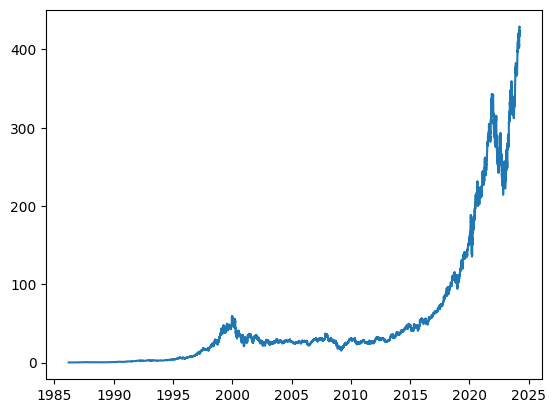

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index,df['Close'])

In [ ]:
import numpy as np

In [ ]:

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '1986-03-18',
                                '2024-03-22',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
9576,2024-03-18,415.100006,425.220001,416.420013,417.320007
9577,2024-03-19,425.220001,416.420013,417.320007,421.410004
9578,2024-03-20,416.420013,417.320007,421.410004,425.230011
9579,2024-03-21,417.320007,421.410004,425.230011,429.369995


In [ ]:
#the limit to number of days to above function is 13779 days.

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9581,), (9581, 3, 1), (9581,))

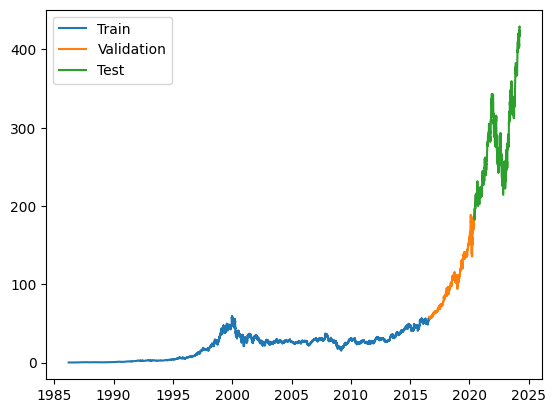

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
240/240 [==============================] - 6s 9ms/step - loss: 104.1328 - mean_absolute_error: 4.6019 - val_loss: 3818.3215 - val_mean_absolute_error: 49.7573
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3853 - mean_absolute_error: 0.3658 - val_loss: 3532.3440 - val_mean_absolute_error: 46.9637
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3348 - mean_absolute_error: 0.3384 - val_loss: 3426.4155 - val_mean_absolute_error: 45.9281
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3543 - mean_absolute_error: 0.3514 - val_loss: 3372.4995 - val_mean_absolute_error: 45.4254
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3218 - mean_absolute_error: 0.3300 - val_loss: 3316.2698 - val_mean_absolute_error: 44.8082
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3336 - mean_absolute_error: 0.3385 - val_loss: 3289.0298 - val_mean_absolute

240/240 [==============================] - 1s 2ms/step


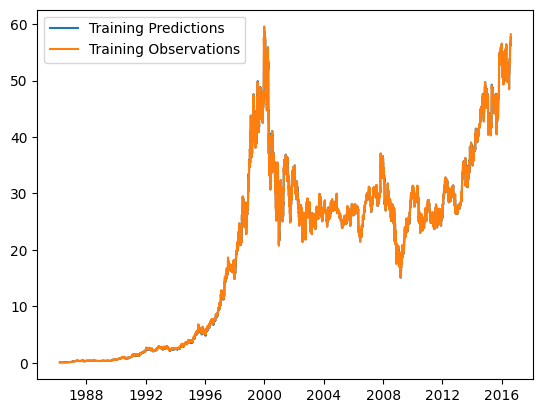

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

30/30 [==============================] - 0s 2ms/step


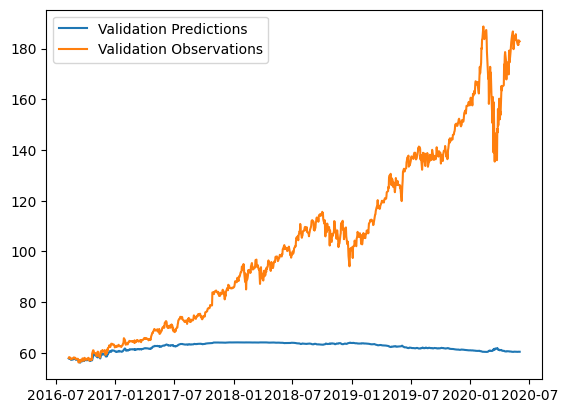

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

30/30 [==============================] - 0s 2ms/step


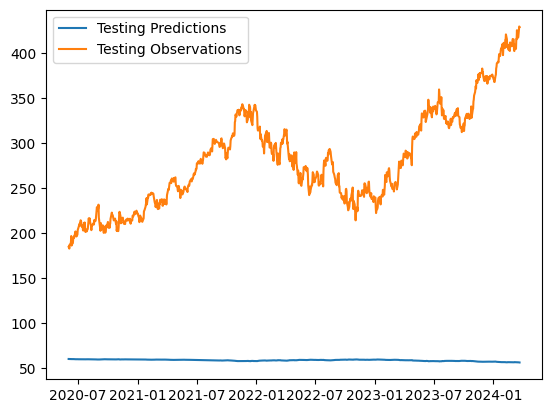

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

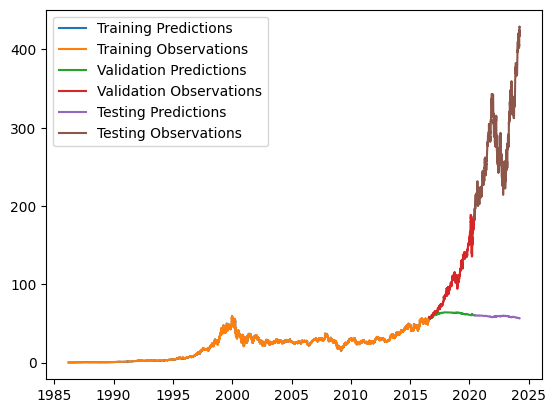

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 17ms/step


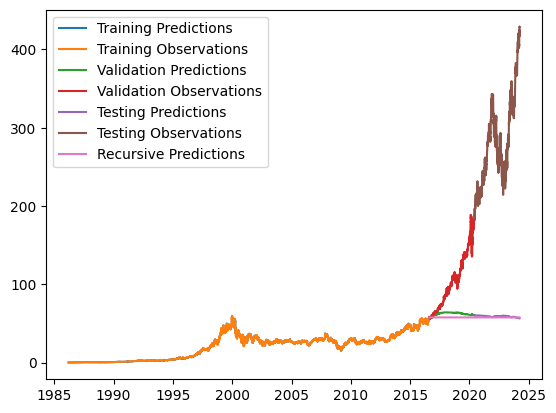

In [ ]:
 plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])